# EDA Project - NYC Taxi Trip 

### Evaluation Metric (MAE)
A suitable evaluation metric would be Mean Absolute Error (MAE). 
MAE is the average of the absolute differences between the predicted and actual values. This metric is preferred because it gives equal weightage to all errors and is less sensitive to outliers compared to other metrics such as Root Mean Squared Error (RMSE) and has the same scale as the target we are predicting.

In [4]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import timedelta
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [44]:
#importing and reading the file to check imported data is correct.
data= pd.read_csv("C:/Users/aitha/OneDrive/Desktop/EDA_NYC_Taxi (1)/nyc_taxi_trip_duration.csv")
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [45]:
# finding out the rows and columns of data
data.shape

(729322, 11)

In [46]:
# Coverting trip_duration from seconds to hours
data['trip_duration'] = data['trip_duration'].apply(lambda x: x/3600)


In [47]:
# Converting yes and no flag into 1 and 0
data['store_and_fwd_flag'] = 1 * (data.store_and_fwd_flag.values == 'Y')

In [48]:
# Checking the above codes are done correctly
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,0,0.111111
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,0,0.305556
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,0,0.454167
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,0,0.316944
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,0,0.235556


In [49]:
# checking datatypes of data
data.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag      int32
trip_duration         float64
dtype: object

In [50]:
#checking missing value
data.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

#### From this we can conclude there is no missing values.

In [35]:
#Checking the statistics of data
data.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
count,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000
mean,1.535403,1.662055,-73.973513,40.750919,-73.973422,40.751775,0.005539,0.264508
std,0.498745,1.312446,0.069754,0.033594,0.069588,0.036037,0.074221,1.073507
min,1.000000,0.000000,-121.933342,34.712234,-121.933304,32.181141,0.000000,0.000278
25%,1.000000,1.000000,-73.991859,40.737335,-73.991318,40.735931,0.000000,0.110278
50%,2.000000,1.000000,-73.981758,40.754070,-73.979759,40.754509,0.000000,0.184167
75%,2.000000,2.000000,-73.967361,40.768314,-73.963036,40.769741,0.000000,0.298611
max,2.000000,9.000000,-65.897385,51.881084,-65.897385,43.921028,1.000000,538.815556


In [51]:
# Converting to datetime 
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])
data['dropoff_datetime'] = pd.to_datetime(data['dropoff_datetime'])

In [52]:
# Creating a new column to get trip_duration
data['check_trip_duration'] = (data['dropoff_datetime'] - data['pickup_datetime']).map(lambda x: x.total_seconds())

duration_difference = data[np.abs(data['check_trip_duration'].values  - data['trip_duration'].values) > 1]
duration_difference.shape

(729309, 12)

In [53]:
data.dtypes 

id                             object
vendor_id                       int64
pickup_datetime        datetime64[ns]
dropoff_datetime       datetime64[ns]
passenger_count                 int64
pickup_longitude              float64
pickup_latitude               float64
dropoff_longitude             float64
dropoff_latitude              float64
store_and_fwd_flag              int32
trip_duration                 float64
check_trip_duration           float64
dtype: object

In [38]:
data.shape

(729322, 12)

In [59]:
# Extracting Information datetime from column and sepreating columns

data['pickup_hour'] = data['pickup_datetime'].dt.hour
data['day_of_week'] = data['pickup_datetime'].dt.weekday
data['pickup_date'] = data['pickup_datetime'].dt.date
data['dropoff_date'] = data['dropoff_datetime'].dt.date
data['dropoff_hour'] = data['dropoff_datetime'].dt.hour

In [60]:
#checking with head()function
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,check_trip_duration,day_of_week,pickup_date,dropoff_date,pickup_hour,dropoff_hour
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,0,0.111111,400.0,0,2016-02-29,2016-02-29,16,16
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,0,0.305556,1100.0,4,2016-03-11,2016-03-11,23,23
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,0,0.454167,1635.0,6,2016-02-21,2016-02-21,17,18
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,0,0.316944,1141.0,1,2016-01-05,2016-01-05,9,10
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,0,0.235556,848.0,2,2016-02-17,2016-02-17,6,6


In [61]:
def time_of_day(x):
    # to calculate what time of it is now
    if x in range(6,12):
        return 'Morning'
    elif x in range(12,16):
        return 'Afternoon'
    elif x in range(16,22):
        return 'Evening'
    else:
        return 'Late night'

data['pickup_time_of_day'] = data['pickup_hour'].apply(time_of_day)
data['dropoff_time_of_day'] = data['dropoff_hour'].apply(time_of_day)

In [66]:
data.drop(columns=['pickup_hour','dropoff_hour'], inplace=True)

In [67]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,check_trip_duration,day_of_week,pickup_date,dropoff_date,pickup_time_of_day,dropoff_time_of_day
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,0,0.111111,400.0,0,2016-02-29,2016-02-29,Evening,Evening
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,0,0.305556,1100.0,4,2016-03-11,2016-03-11,Late night,Late night
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,0,0.454167,1635.0,6,2016-02-21,2016-02-21,Evening,Evening
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,0,0.316944,1141.0,1,2016-01-05,2016-01-05,Morning,Morning
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,0,0.235556,848.0,2,2016-02-17,2016-02-17,Morning,Morning


In [68]:
data.shape

(729322, 17)

#### Since we are asked for model buliding in problem we skip the univariate and bivariate analysis and go for model buliding part


## Benchmark model

##### Shuffling and dividing data into Train and Test Set

In [197]:
from sklearn.utils import shuffle
# Shuffling the Dataset and putting random state becoz every time we shuffle the value remains same
data = shuffle(data, random_state = 42)

In [198]:
data.head()

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,check_trip_duration,day_of_week,pickup_time_of_day,dropoff_time_of_day
247177,1,-73.992981,40.737129,-73.981178,40.781891,0.420556,1514.0,6,Evening,Evening
41189,1,-73.962509,40.773117,-73.979301,40.755665,0.370000,1332.0,0,Morning,Afternoon
441690,1,-73.999649,40.718616,-73.982681,40.774021,0.511111,1840.0,5,Afternoon,Afternoon
246922,2,-73.972954,40.756306,-73.949081,40.775032,0.285278,1027.0,4,Evening,Evening
202073,2,-74.003334,40.743763,-74.004105,40.751137,0.081944,295.0,5,Evening,Evening


In [199]:
#Dividing the data into 4 parts
div = int(data.shape[0]/4)

#  Creating the test and train data by putting 3 parts to train set and 1 part to test set
train = data.loc[:3*div+1,:]
test = data.loc[3*div+1:]

train.head()

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,check_trip_duration,day_of_week,pickup_time_of_day,dropoff_time_of_day
247177,1,-73.992981,40.737129,-73.981178,40.781891,0.420556,1514.0,6,Evening,Evening
41189,1,-73.962509,40.773117,-73.979301,40.755665,0.370000,1332.0,0,Morning,Afternoon
441690,1,-73.999649,40.718616,-73.982681,40.774021,0.511111,1840.0,5,Afternoon,Afternoon
246922,2,-73.972954,40.756306,-73.949081,40.775032,0.285278,1027.0,4,Evening,Evening
202073,2,-74.003334,40.743763,-74.004105,40.751137,0.081944,295.0,5,Evening,Evening


In [200]:
test.head()

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,check_trip_duration,day_of_week,pickup_time_of_day,dropoff_time_of_day
546991,1,-73.991364,40.732590,-74.000526,40.742283,0.096111,346.0,2,Morning,Morning
115009,1,-73.966866,40.761665,-74.014481,40.708088,0.278611,1003.0,0,Evening,Evening
127693,1,-73.991577,40.770470,-74.000137,40.730358,0.211389,761.0,6,Evening,Evening
204591,2,-73.874580,40.774097,-73.960419,40.762299,0.364722,1313.0,0,Evening,Evening
94205,1,-73.994789,40.750259,-73.999840,40.727032,0.224722,809.0,3,Late night,Late night


#### since our target variable is trip duratation which is continuous variable we use mean , in first we just find mean of target variable the keep on adding variable to make our model better and robust.

### Simple Mean (trip_duration)

In [201]:
# Creating and storing simple mean in a new column in the test set as "simple_mean"
test['simple_mean'] = train['trip_duration'].mean()
test['simple_mean']

546991    0.26507
115009    0.26507
127693    0.26507
204591    0.26507
94205     0.26507
           ...   
604610    0.26507
112278    0.26507
725627    0.26507
371399    0.26507
5948      0.26507
Name: simple_mean, Length: 426065, dtype: float64

In [203]:
#calculating mean absolute error
from sklearn.metrics import mean_absolute_error as MAE

simple_mean_error = MAE(test['trip_duration'] , test['simple_mean'])
simple_mean_error

0.17207002339174687

### Mean trip_duration with respect to dropoff_time_of_day

In [89]:
#trip_duration mean with respect to the mean of dropoff time of the day
dropoff =pd.pivot_table(train, values='trip_duration', index = ['dropoff_time_of_day'], aggfunc=np.mean)
dropoff

,trip_duration
dropoff_time_of_day,
Afternoon,0.284258
Evening,0.269666
Late night,0.256343
Morning,0.247905


In [90]:
# initializing new column to zero
test['dropoff_mean'] = 0

# For every unique entry in dropoff longitude
for i in train['dropoff_time_of_day'].unique():
  # Assign the mean value corresponding to unique entry
  test['dropoff_mean'][test['dropoff_time_of_day'] == str(i)] = train['trip_duration'][train['dropoff_time_of_day'] == str(i)].mean()

In [86]:
#calculating mean absolute error
dropoff_error = MAE(test['trip_duration'] , test['dropoff_mean'] )
dropoff_error

0.17263892934259387

In [93]:
#calculating mean absolute error
dropoff_error = np.sqrt(MSE(test['trip_duration'] , test['dropoff_mean'] ))
dropoff_error

0.8903865469170373

### Mean trip_duration with respect to pickup_time_of_day

In [95]:
#trip_duration mean with respect to the mean of pickup time of the day
pickup = pd.pivot_table(train, values='trip_duration', index = ['pickup_time_of_day'], aggfunc=np.mean)
pickup

,trip_duration
pickup_time_of_day,
Afternoon,0.291531
Evening,0.264078
Late night,0.255589
Morning,0.250610


In [96]:
# initializing new column to zero
test['pickup_mean'] = 0

# For every unique entry in pickup longitude
for i in train['pickup_time_of_day'].unique():
  # Assign the mean value corresponding to unique entry
  test['pickup_mean'][test['pickup_time_of_day'] == str(i)] = train['trip_duration'][train['pickup_time_of_day'] == str(i)].mean()

In [98]:
#calculating mean absolute error
pickup_error = MAE(test['trip_duration'] , test['pickup_mean'] )
pickup_error

0.17262796487353868

### Mean trip_duration with respect to passenger_count

In [118]:
##trip_duration_hour mean with respect to the mean of passenger_count
pass_count = pd.pivot_table(train, values='trip_duration', index = ["passenger_count"], aggfunc=np.mean)
pass_count

,trip_duration
passenger_count,
0,0.092981
1,0.255343
2,0.277822
3,0.287332
4,0.285759
5,0.299641
6,0.300193


In [120]:
# initializing new column to zero
test['pass_count'] = 0

# For every unique entry in passenger count
for i in train['passenger_count'].unique():
  # Assign the mean value corresponding to unique entry
  test['pass_count'][test['passenger_count'] == str(i)] = train['trip_duration'][train['passenger_count'] == str(i)].mean()

pass_count_error = MAE(test['trip_duration'] , test['pass_count'] )
pass_count_error

0.2652592807074405

### Mean trip_duration with respect store_and_fwd_flag

In [128]:
store_and_fwd = pd.pivot_table(train, values='trip_duration', index = ["store_and_fwd_flag"], aggfunc=np.mean)
store_and_fwd 

,trip_duration
store_and_fwd_flag,
0,0.264109
1,0.304058


In [130]:
# initializing new column to zero
test['store_and_fwd'] = 0

# For every unique entry in pickup latitude
for i in train['store_and_fwd_flag'].unique():
  # Assign the mean value corresponding to unique entry
  test['store_and_fwd'][test['store_and_fwd_flag'] == str(i)] = train['trip_duration'][train['store_and_fwd_flag'] == str(i)].mean() 
 
str_and_fwd_error = MAE(test['store_and_fwd'] , test['trip_duration'] )
str_and_fwd_error

0.26515595259657526

### Mean trip_duration with respect to passenger_count, store_and_fwd_flag

In [113]:
##trip_duration mean with respect to the mean of passenger_count
pass_store = pd.pivot_table(train, values='trip_duration', index = ["passenger_count", "store_and_fwd_flag"], aggfunc=np.mean)
pass_store

trip_duration
passenger_count store_and_fwd_flag               
0               0                        0.098899
                1                        0.010139
1               0                        0.255153
                1                        0.286368
2               0                        0.277306
                1                        0.364515
3               0                        0.287040
                1                        0.346985
4               0                        0.284720
                1                        0.421980
5               0                        0.299639
                1                        0.357778
6               0                        0.300193

In [114]:
# initializing new column to zero
test['pass_store'] = 0
 # Assigning variables to strings ( to shorten code length)
s1 = 'passenger_count'
s2 = 'store_and_fwd_flag'

# For every Unique Value in s1
for i in test[s1].unique():
  # For every Unique Value in s2
  for j in test[s2].unique():
         # Calculate and Assign mean to new column, corresponding to both unique values of s1 and s2 simultaneously
        test['pass_store'][(test[s1] == i) & (test[s2] == str(j)) ] = train['trip_duration'][(train[s1] == i) & (train[s2] == str(j))].mean()



In [115]:
test.dropna(subset=['pass_store'], inplace=True)

In [116]:
pass_count_error = MAE(test['trip_duration'] , test['pass_store'] )
pass_count_error

0.2652592807074405

### Mean trip_duration with respect to passenger_count, pickup_time_of_day and dropoff_time_of_day

In [122]:
combo = pd.pivot_table(train, values = 'trip_duration', index = ['passenger_count','pickup_time_of_day','dropoff_time_of_day'], aggfunc = np.mean)
combo

trip_duration
passenger_count pickup_time_of_day dropoff_time_of_day               
0               Afternoon          Afternoon                 0.305417
                Evening            Evening                   0.054352
                                   Late night                0.106944
                Late night         Late night                0.023856
                Morning            Afternoon                 0.432222
...                                                               ...
6               Late night         Late night                0.282054
                                   Morning                   0.313738
                Morning            Afternoon                 0.376369
                                   Late night               16.731944
                                   Morning                   0.267228

[75 rows x 1 columns]

In [123]:
# Initiating new empty column
test['Super_mean'] = 0

# Assigning variables to strings ( to shorten code length)
s1 = 'passenger_count'
s2 = 'pickup_time_of_day'
s3 = 'dropoff_time_of_day'

# For every Unique Value in s1
for i in test[s1].unique():
  # For every Unique Value in s2
  for j in test[s2].unique():
    # For every Unique Value in s3
      for k in test[s3].unique():
    # Calculate and Assign mean to new column, corresponding to both unique values of s1 and s2 simultaneously
        test['Super_mean'][(test[s1] == i) & (test[s2] == str(j)) & (test[s3] == str(k))] = train['trip_duration'][(train[s1] == i) & (train[s2] == str(j)) & (train[s3] == str(k))].mean()

In [124]:
test.dropna(subset=['Super_mean'], inplace=True)

In [126]:
#calculating mean absolute error
super_mean_error = MAE(test['trip_duration'] , test['Super_mean'] )
super_mean_error

0.16813712281281906

In [132]:
#calculating mean absolute error
super_mean_error = np.sqrt(MSE(test['trip_duration'] , test['Super_mean'] ))
super_mean_error

0.8618719927438696

## Conclusion


1. The error of simple mean of trip duration  is 0.172776515860276, 0.8899768861825853 which is also almost equal to MAE of dropoff time and pickup time of the day is 0.17263892934259387, 0.17262796487353868 respectively.

2. The Mean  absolute error of  trip duration with respect to str_fwd_error and passanger count error is almost i.e. 0.26515595259657526, 

3. The Mean  absolute error of trip duration with respect to passenger_count, store_and_fwd_flag is 0.2652592807074405.

4.The Mean absolute error of trip duration  with respect to pickup_time_error , dropoff_time_error and pass_count error is 0.16813712281281906



## KNN model

In [133]:
# top 5 rows of the dataset
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,check_trip_duration,day_of_week,pickup_date,dropoff_date,pickup_time_of_day,dropoff_time_of_day
469114,id2380741,2,2016-05-21 10:40:14,2016-05-21 10:51:11,1,-73.981796,40.762035,-73.972267,40.781265,0,0.182500,657.0,5,2016-05-21,2016-05-21,Morning,Morning
694852,id3946961,2,2016-01-08 18:49:27,2016-01-08 18:52:42,5,-73.980965,40.747677,-73.982704,40.741161,0,0.054167,195.0,4,2016-01-08,2016-01-08,Evening,Evening
696324,id0833913,1,2016-05-22 00:54:10,2016-05-22 01:08:10,1,-73.951065,40.782722,-73.867691,40.833664,0,0.233333,840.0,6,2016-05-22,2016-05-22,Late night,Late night
356496,id1336849,1,2016-06-11 10:32:12,2016-06-11 10:38:50,1,-73.987625,40.762791,-73.973518,40.762909,0,0.110556,398.0,5,2016-06-11,2016-06-11,Morning,Morning
645318,id1610858,1,2016-04-03 10:45:51,2016-04-03 10:57:13,3,-73.964333,40.792503,-73.988609,40.758369,0,0.189444,682.0,6,2016-04-03,2016-04-03,Morning,Morning


In [135]:
data.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,check_trip_duration,day_of_week
count,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,7.293220e+05,729322.000000
mean,1.535403,1.662055,-73.973513,40.750919,-73.973422,40.751775,0.005539,0.264508,9.522291e+02,3.049081
std,0.498745,1.312446,0.069754,0.033594,0.069588,0.036037,0.074221,1.073507,3.864626e+03,1.954470
min,1.000000,0.000000,-121.933342,34.712234,-121.933304,32.181141,0.000000,0.000278,1.000000e+00,0.000000
25%,1.000000,1.000000,-73.991859,40.737335,-73.991318,40.735931,0.000000,0.110278,3.970000e+02,1.000000
50%,2.000000,1.000000,-73.981758,40.754070,-73.979759,40.754509,0.000000,0.184167,6.630000e+02,3.000000
75%,2.000000,2.000000,-73.967361,40.768314,-73.963036,40.769741,0.000000,0.298611,1.075000e+03,5.000000
max,2.000000,9.000000,-65.897385,51.881084,-65.897385,43.921028,1.000000,538.815556,1.939736e+06,6.000000


In [136]:
data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'check_trip_duration', 'day_of_week', 'pickup_date',
       'dropoff_date', 'pickup_time_of_day', 'dropoff_time_of_day'],
      dtype='object')

In [138]:
data.drop(columns=['id','vendor_id','pickup_datetime','dropoff_datetime','store_and_fwd_flag','dropoff_date','pickup_date'],inplace=True)

In [139]:
data.dtypes

passenger_count          int64
pickup_longitude       float64
pickup_latitude        float64
dropoff_longitude      float64
dropoff_latitude       float64
trip_duration          float64
check_trip_duration    float64
day_of_week              int64
pickup_time_of_day      object
dropoff_time_of_day     object
dtype: object

In [140]:
df = data.iloc[1:150001,]
cat_cols = ['pickup_time_of_day', 'dropoff_time_of_day']
df = pd.concat([df, pd.get_dummies(df[cat_cols].astype('str'))], axis=1)
df.drop(columns = ['pickup_time_of_day', 'dropoff_time_of_day'],inplace = True)
df

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,check_trip_duration,day_of_week,pickup_time_of_day_Afternoon,pickup_time_of_day_Evening,pickup_time_of_day_Late night,pickup_time_of_day_Morning,dropoff_time_of_day_Afternoon,dropoff_time_of_day_Evening,dropoff_time_of_day_Late night,dropoff_time_of_day_Morning
694852,5,-73.980965,40.747677,-73.982704,40.741161,0.054167,195.0,4,0,1,0,0,0,1,0,0
696324,1,-73.951065,40.782722,-73.867691,40.833664,0.233333,840.0,6,0,0,1,0,0,0,1,0
356496,1,-73.987625,40.762791,-73.973518,40.762909,0.110556,398.0,5,0,0,0,1,0,0,0,1
645318,3,-73.964333,40.792503,-73.988609,40.758369,0.189444,682.0,6,0,0,0,1,0,0,0,1
498463,1,-73.956047,40.781849,-73.977707,40.758499,0.210556,758.0,5,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60847,1,-73.870895,40.773697,-73.982536,40.742413,0.276389,995.0,2,0,1,0,0,0,1,0,0
219009,2,-73.959290,40.801121,-73.984360,40.769802,0.198889,716.0,0,0,0,0,1,0,0,0,1
476363,5,-73.961182,40.777611,-73.972412,40.786308,0.173889,626.0,1,1,0,0,0,1,0,0,0
554000,1,-73.954231,40.765156,-73.975334,40.752388,0.366667,1320.0,4,1,0,0,0,1,0,0,0


In [141]:
#seperate features variables and target variables or independent and dependent variables
x = df.drop(['trip_duration'], axis=1)
y = df["trip_duration"]
x.shape,y.shape

((150000, 15), (150000,))

In [142]:
# Scaling up the data to get all in one particular scale by using MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [143]:
# Converting into dataframe
x = pd.DataFrame(x_scaled)

In [144]:
# Importing Train test split and applying random state
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 56)

In [145]:
#Implementing and importing KNN regressor and metric
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.metrics import mean_absolute_error as MAE

In [206]:
# Creating instance of KNN
reg = KNN(n_neighbors = 5)
# Fitting the model
reg.fit(train_x, train_y)
# Predicting over the Train Set and calculating MSE
test_predict = reg.predict(test_x)
k = MAE(test_predict, test_y)
print('Test MAE    ', k )

Test MAE     0.1005912162962963


## Finding K value using Elbow classifier

In [149]:
def Elbow(K):
  #initiating empty list
    test_MAE = []
  
  #training model for evey value of K
    for i in K:
        #Instance of KNN
        reg = KNN(n_neighbors = i)
        reg.fit(train_x, train_y)
        #Appending MAE value to empty list claculated using the predictions
        tmp = reg.predict(test_x)
        tmp = MAE(tmp,test_y)
        test_MAE.append(tmp)
    
    return test_MAE

In [164]:
#Defining K range
k = range(1,10)

In [165]:
# calling above defined function
test = Elbow(k)

Text(0.5, 1.0, 'Elbow Curve for test')

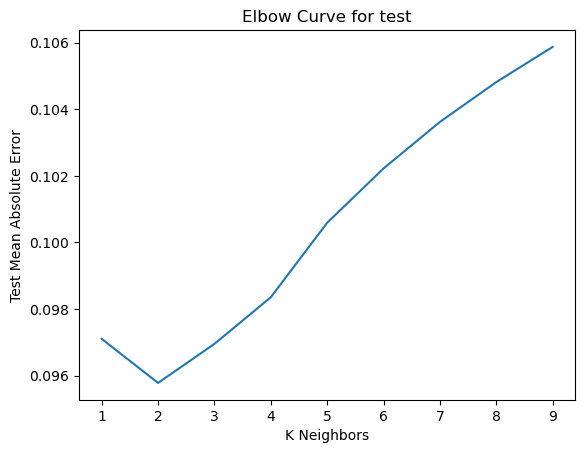

In [166]:
# plotting the Curves
plt.plot(k, test)
plt.xlabel('K Neighbors')
plt.ylabel('Test Mean Absolute Error')
plt.title('Elbow Curve for test')

In [207]:
# Creating instance of KNN
reg = KNN(n_neighbors = 2)

# Fitting the model
reg.fit(train_x, train_y)

# Predicting over the Train Set and calculating F1
test_predict = reg.predict(test_x)
k = MAE(test_predict, test_y)
print('Test MAE    ', k )

Test MAE     0.09577997037037037


 For different values of k the Test MAE values are 1- 0.09710413333333333 2-0.09577997037037037 3- 0.09695288395061728

In [167]:
knn_train_score = reg.score(train_x,train_y)
knn_train_score*100

23.577168212623857

In [168]:
knn_test_score = reg.score(test_x,test_y)
knn_test_score*100

27.52035767562998

# Conclusions

1.The Test MAE is      when we took the value of k as 2. We used Elbow method in order to determine the value of k. On using Elbow method we found that at k = 2(0.029005723456790127) the test MAE is lesser than the MAE at K =5 (0.1005912162962963) 

2.The train score is 23.577168212623857

3.The test score is 27.52035767562998

## Linear model

In [169]:
#Importing data
data.head()

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,check_trip_duration,day_of_week,pickup_time_of_day,dropoff_time_of_day
469114,1,-73.981796,40.762035,-73.972267,40.781265,0.182500,657.0,5,Morning,Morning
694852,5,-73.980965,40.747677,-73.982704,40.741161,0.054167,195.0,4,Evening,Evening
696324,1,-73.951065,40.782722,-73.867691,40.833664,0.233333,840.0,6,Late night,Late night
356496,1,-73.987625,40.762791,-73.973518,40.762909,0.110556,398.0,5,Morning,Morning
645318,3,-73.964333,40.792503,-73.988609,40.758369,0.189444,682.0,6,Morning,Morning


In [170]:
df = data.iloc[1:150001,]
cat_cols = ['pickup_time_of_day', 'dropoff_time_of_day']
df = pd.concat([data, pd.get_dummies(df[cat_cols].astype('str'))], axis=1)
df.drop(columns = ['pickup_time_of_day', 'dropoff_time_of_day'],inplace = True)
df

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,check_trip_duration,day_of_week,pickup_time_of_day_Afternoon,pickup_time_of_day_Evening,pickup_time_of_day_Late night,pickup_time_of_day_Morning,dropoff_time_of_day_Afternoon,dropoff_time_of_day_Evening,dropoff_time_of_day_Late night,dropoff_time_of_day_Morning
469114,1,-73.981796,40.762035,-73.972267,40.781265,0.182500,657.0,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
694852,5,-73.980965,40.747677,-73.982704,40.741161,0.054167,195.0,4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
696324,1,-73.951065,40.782722,-73.867691,40.833664,0.233333,840.0,6,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
356496,1,-73.987625,40.762791,-73.973518,40.762909,0.110556,398.0,5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
645318,3,-73.964333,40.792503,-73.988609,40.758369,0.189444,682.0,6,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,1,-73.960854,40.811741,-73.960251,40.817940,0.139167,501.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
365838,1,-73.984215,40.728931,-73.985313,40.738132,0.082778,298.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131932,1,-73.996338,40.723541,-73.994255,40.726402,0.036667,132.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
671155,1,-73.961449,40.765327,-73.980003,40.745914,0.238889,860.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [171]:
# Performing the train test split function
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 56)

In [172]:
#Implementing and importing Linear Regression 
from sklearn.linear_model import LinearRegression as LR

In [173]:
# Creating instance of Linear Regresssion
lr = LR()

# Fitting the model
lr.fit(train_x, train_y)

LinearRegression()

In [174]:
# Predicting over the Train Set and calculating error
train_predict = lr.predict(train_x)
k = MAE(train_predict, train_y)
print('Training Mean Absolute Error', k )

Training Mean Absolute Error 1.1216615220544882e-14


In [175]:
# Predicting over the Test Set and calculating error
test_predict = lr.predict(test_x)
k = MAE(test_predict, test_y)
print('Test Mean Absolute Error    ', k )

Test Mean Absolute Error     1.112948637474002e-14


#### Parameters of Linear Regression

In [176]:
lr.coef_

array([-9.66507073e-16,  2.06334949e-13,  1.02053891e-13, -4.41454964e-13,
       -4.15677258e-13,  5.38815278e+02, -2.19269047e-15,  1.51894635e-01,
        1.51894635e-01,  1.51894635e-01,  1.51894635e-01, -9.15061330e-03,
       -9.15061330e-03, -9.15061330e-03, -9.15061330e-03])

#### Plotting the coefficients

In [177]:
range(len(train_x.columns))

range(0, 15)

Text(0.5, 1.0, 'coefficient plot')

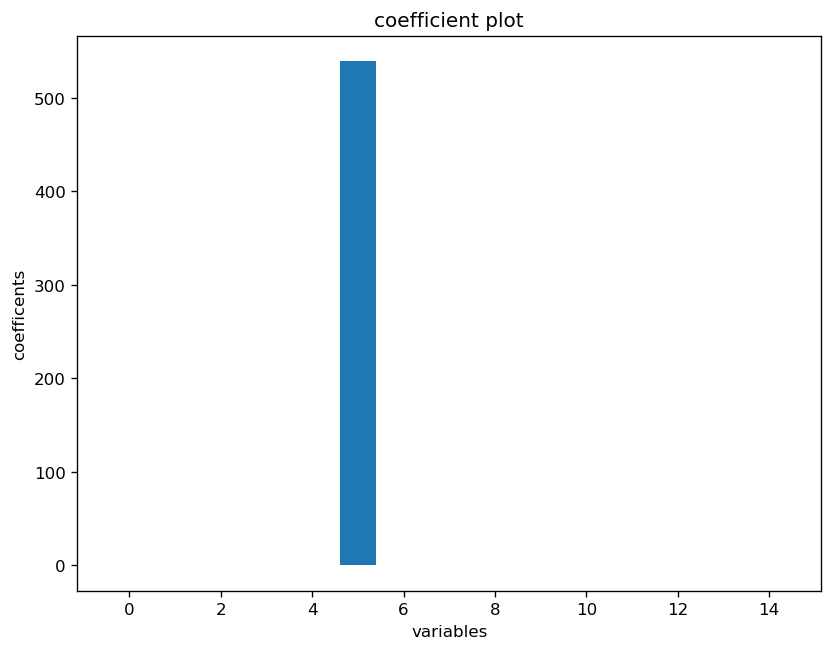

In [182]:
plt.figure(figsize=(8,6), dpi=120, facecolor="w", edgecolor="b")
x=range(len(train_x.columns))
y=lr.coef_
plt.bar(x,y)
plt.xlabel("variables")
plt.ylabel("coefficents")
plt.title("coefficient plot")


In [189]:
# Arranging and calculating the Residuals
residuals = pd.DataFrame({
    'fitted values' : test_y,
    'predicted values' : test_predict})

residuals['residuals'] = residuals['fitted values'] - residuals['predicted values']
residuals.head()

,fitted values,predicted values,residuals
359019,0.147222,0.147222,5.356826e-15
609490,0.162500,0.162500,9.298118e-15
328509,0.208056,0.208056,-2.625677e-14
124487,0.125833,0.125833,1.137979e-15
116857,0.478611,0.478611,-2.703393e-14


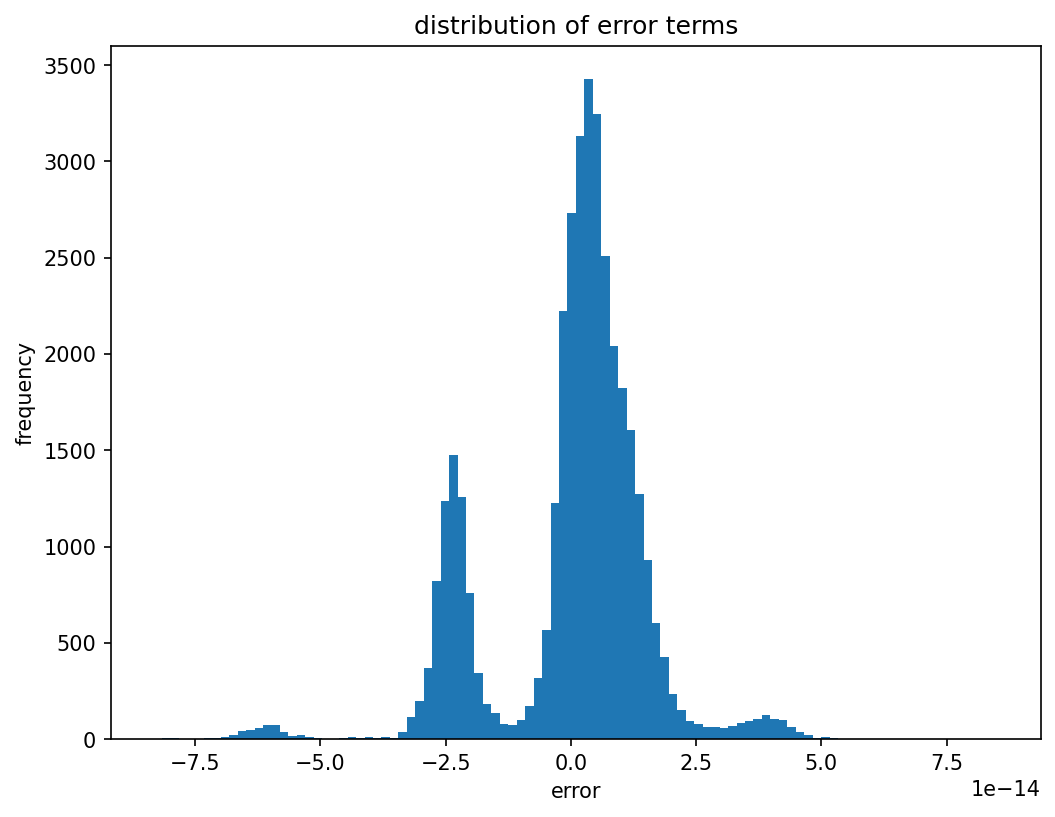

In [190]:
plt.figure(figsize=(8,6),dpi=150,facecolor="w",edgecolor="b")
plt.hist(residuals.residuals,bins=100)
plt.xlabel("error")
plt.ylabel("frequency")
plt.title("distribution of error terms")
plt.show()

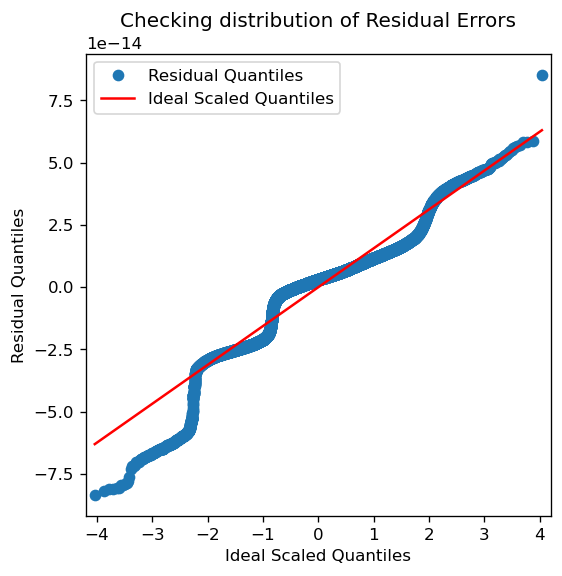

In [191]:
# importing the QQ-plot from the from the statsmodels
from statsmodels.graphics.gofplots import qqplot

## Plotting the QQ plot
fig, ax = plt.subplots(figsize=(5,5) , dpi = 120)
qqplot(residuals.residuals, line = 's' , ax = ax)
plt.ylabel('Residual Quantiles')
plt.xlabel('Ideal Scaled Quantiles')
plt.legend(["Residual Quantiles","Ideal Scaled Quantiles"])
plt.title('Checking distribution of Residual Errors')
plt.show()

In [192]:
#calculating the train score 

linear_train_score = lr.score(train_x,train_y)
linear_train_score*100

100.0

In [193]:
#calculating the test score

linear_test_score = lr.score(test_x,test_y)
linear_test_score*100

100.0

# Conclusions

1. The training and test MAE has a huge difference as the training MAE is 1.1216615220544882e-14 and testing MAE is 1.112948637474002e-14
2. The coefficients we observed that there are some negative values as well and on plotting the qqplot we see that the residual quantile line doesn't fit over all ideal scaled quantiles.


## Plotting Bar Graph


In [194]:
linear_train_score,knn_train_score

(1.0, 0.23577168212623856)

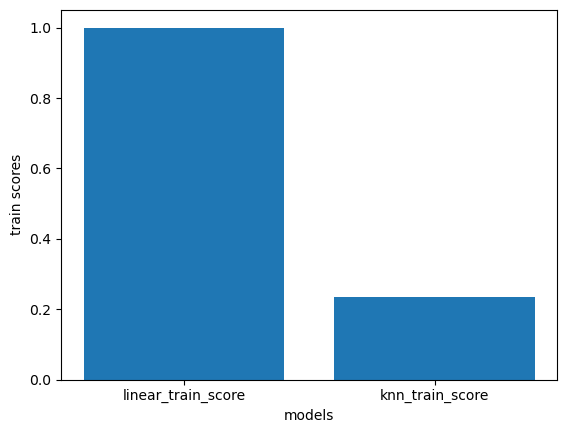

In [195]:
#assining the train score values in x,y
x=["linear_train_score","knn_train_score"]
y=[1.0, 0.23577168212623856 ]
plt.figure(dpi=100)
plt.bar(x,y)
plt.xlabel("models")
plt.ylabel("train scores")
plt.show()

#### Test score

In [204]:
knn_test_score, linear_test_score,simple_mean_error

(0.2752035767562998, 1.0, 0.17207002339174687)

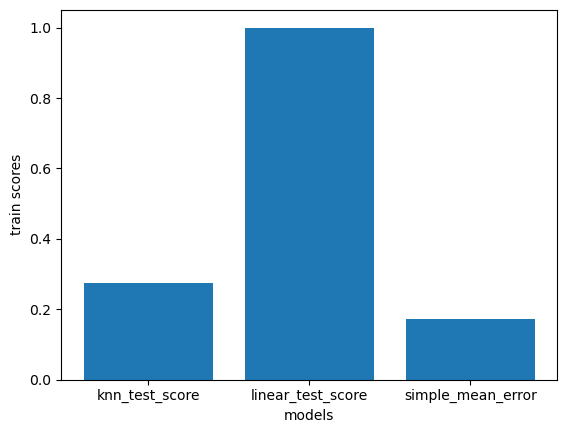

In [205]:
#assining the test score value in x1,y1
x1=["knn_test_score","linear_test_score","simple_mean_error"]
y1=[0.2752035767562998, 1.0, 0.17207002339174687]
plt.figure(dpi=100)
plt.bar(x1,y1)
plt.xlabel("models")
plt.ylabel("train scores")
plt.show()

### Conclusion

 From the above bar graph for both train and test score i prefer linear model is the best.